## Imports

In [ ]:
import os
import xarray as xr
import matplotlib.pyplot as plt

## Step 1: Load Data from Files

### 1.1. Load INX and SIMX Files

In [1]:
def load_inx_file(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return data

def load_simx_file(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return data

In [2]:
# One directory up to the project root
base_dir = os.path.dirname(os.getcwd())

# Status quo directory path
statusquo_dir = os.path.join(base_dir, 'data', 'statusquo')

# Relative paths
inx_file = os.path.join(statusquo_dir, 'Playground_statusquo.INX')
simx_file = os.path.join(statusquo_dir, 'Playground_statusquo.simx')

# Load the files
inx_data = load_inx_file(inx_file)
simx_data = load_simx_file(simx_file)

# Displaying a snippet of the data (for debugging)
print("INX File Data:", inx_data[:5])  # first 5 lines
print("SIMX File Data:", simx_data[:5])


INX File Data: ['<ENVI-MET_Datafile>\n', '<Header>\n', '<filetype>INPX ENVI-met Area Input File</filetype>\n', '<version>440</version>\n', '<revisiondate>13.09.2024 19:32:05</revisiondate>\n']
SIMX File Data: ['<ENVI-MET_Datafile>\n', '<Header>\n', '<filetype>SIMX</filetype>\n', '<version>2</version>\n', '<revisiondate>13.09.2024 17:58:04</revisiondate>\n']


### 1.2 Load Climate Input (FOX) Data

In [3]:
# Relative paths the FOX file
fox_file = os.path.join(statusquo_dir, 'Playground.FOX')

# Function to load the FOX file
def load_fox_file(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return data

# Load FOX data
fox_data = load_fox_file(fox_file)

# Display a snippet of the climate input data
print("FOX File Data:", fox_data[:5])

FOX File Data: ['{\n', '    "fileType": "ENVI-met JSON Forcing File",\n', '    "metaData": {\n', '        "fileDescription": "FULL FORCING FOR ENVI-met",\n', '        "remark": "",\n']


## Step 2: Extract and Visualize Data

### Work with the .nc File

##### 1. Loading the netCDF File:

In [7]:
# Use the current working directory but go one directory up to the project root
#base_dir = os.path.dirname(os.getcwd())  # Go up one directory level

# Define the status quo directory path
#statusquo_dir = os.path.join(base_dir, 'data', 'statusquo')

# Use relative paths for your .nc file
nc_file = os.path.join(statusquo_dir, 'Playground_2024-07-06_04.00.00.nc')

# Load the netCDF file using xarray
ds = xr.open_dataset(nc_file)

# Explore the contents of the netCDF file
print(ds)


<xarray.Dataset> Size: 10GB
Dimensions:                                (Time: 25, GridsI: 100, GridsJ: 100,
                                            GridsK: 29, SoilLevels: 19)
Coordinates:
  * Time                                   (Time) datetime64[ns] 200B 2024-07...
  * GridsI                                 (GridsI) float32 400B 5.0 ... 263.8
  * GridsJ                                 (GridsJ) float32 400B 5.0 ... 263.8
  * GridsK                                 (GridsK) float32 116B 0.3 ... 73.5
  * SoilLevels                             (SoilLevels) float32 76B 0.005 ......
Data variables: (12/378)
    crs                                    int32 4B ...
    UTM_X                                  (GridsJ, GridsI) float32 40kB ...
    UTM_Y                                  (GridsJ, GridsI) float32 40kB ...
    Lon                                    (GridsJ, GridsI) float32 40kB ...
    Lat                                    (GridsJ, GridsI) float32 40kB ...
    GridIndex       

##### 2. Downsampling or Slicing the Data

In [10]:
# Check the available values for GridsK (height levels)
print(ds['GridsK'].values)


[ 0.3  0.9  1.5  2.1  2.7  4.5  7.5 10.5 13.5 16.5 19.5 22.5 25.5 28.5
 31.5 34.5 37.5 40.5 43.5 46.5 49.5 52.5 55.5 58.5 61.5 64.5 67.5 70.5
 73.5]


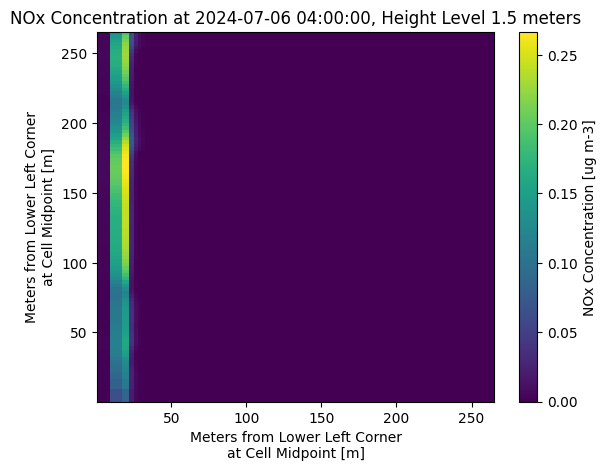

In [11]:
# Select data for a specific time step and height level
time_step = '2024-07-06 04:00:00'
height_level = 1.5  # Choosing one of the valid height levels

# Example: Let's extract NOx concentration for this time and height level
nox_concentration = ds['NOxConc'].sel(Time=time_step, GridsK=height_level)

# Plot the NOx concentration for this time and height
nox_concentration.plot(cmap='viridis')
plt.title(f'NOx Concentration at {time_step}, Height Level {height_level} meters')
plt.show()


In [13]:
# List all variables in the dataset
print(ds.data_vars)


Data variables:
    crs                                    int32 4B ...
    UTM_X                                  (GridsJ, GridsI) float32 40kB ...
    UTM_Y                                  (GridsJ, GridsI) float32 40kB ...
    Lon                                    (GridsJ, GridsI) float32 40kB ...
    Lat                                    (GridsJ, GridsI) float32 40kB ...
    GridIndex                              (Time, GridsJ, GridsI) float64 2MB ...
    SoilProfileType                        (Time, GridsJ, GridsI) float64 2MB ...
    ZTopo                                  (Time, GridsJ, GridsI) float64 2MB ...
    DEMOffset                              (Time, GridsJ, GridsI) float64 2MB ...
    Inclination                            (Time, GridsJ, GridsI) float32 1MB ...
    Exposition                             (Time, GridsJ, GridsI) float32 1MB ...
    ShadowFlag                             (Time, GridsJ, GridsI) float64 2MB ...
    TSurf                                  (Ti

##### Visualizing Surface Temperature (TSurf)

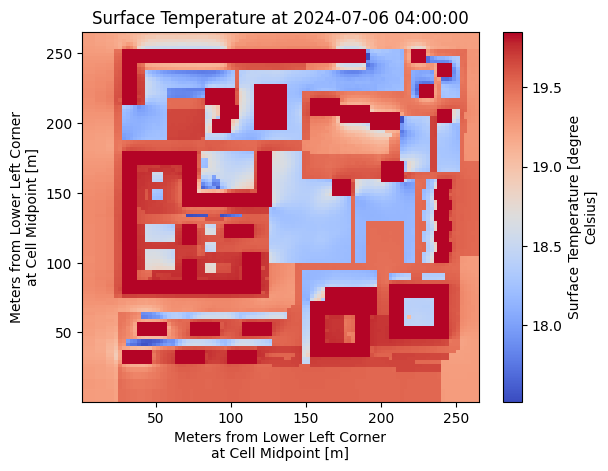

In [14]:
import matplotlib.pyplot as plt

# Select the time step and height level
time_step = '2024-07-06 04:00:00'  # Example time step
# TSurf is a 2D variable (Time, GridsJ, GridsI), so no height level needed

# Extract the surface temperature data for the specific time step
surface_temperature = ds['TSurf'].sel(Time=time_step)

# Plot the surface temperature as a heatmap
surface_temperature.plot(cmap='coolwarm')
plt.title(f'Surface Temperature at {time_step}')
plt.show()

Compare Different Time Steps

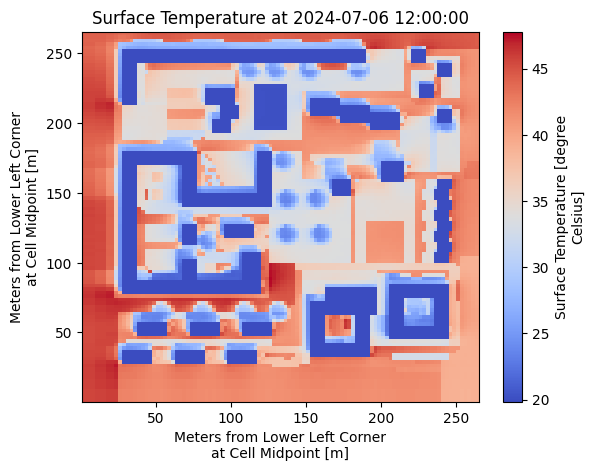

In [15]:
# Select another time step
time_step2 = '2024-07-06 12:00:00'  # Noon time, for example
surface_temperature_time2 = ds['TSurf'].sel(Time=time_step2)

# Plot surface temperature at the new time
surface_temperature_time2.plot(cmap='coolwarm')
plt.title(f'Surface Temperature at {time_step2}')
plt.show()


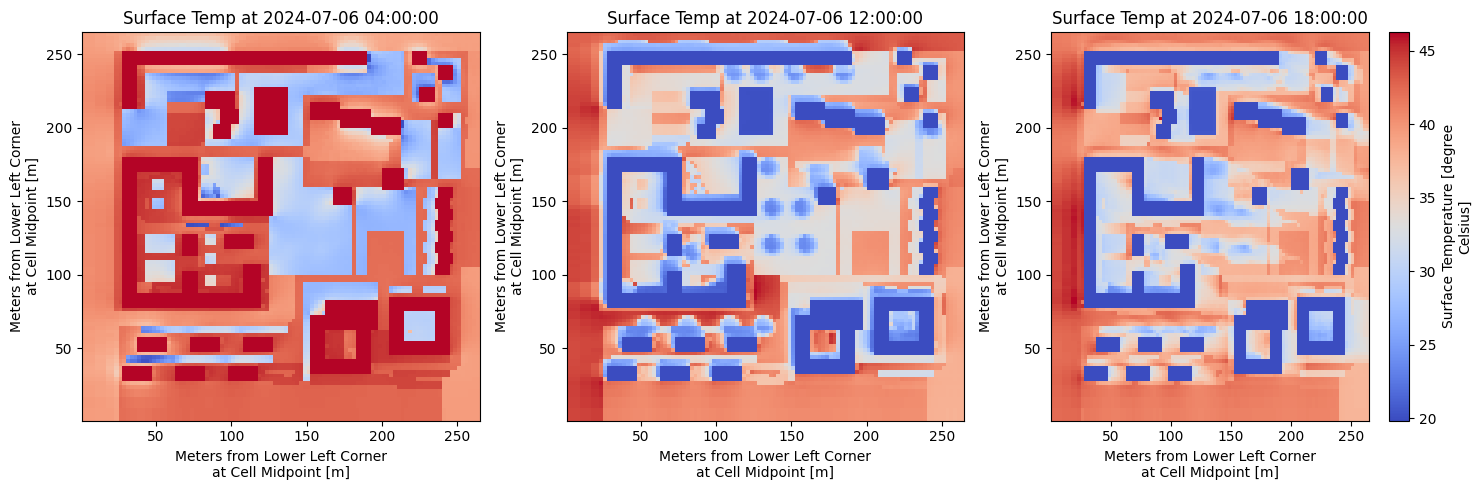

In [16]:
# Define the time steps to compare
time_steps = ['2024-07-06 04:00:00', '2024-07-06 12:00:00', '2024-07-06 18:00:00']

# Set up a figure with subplots (one subplot per time step)
fig, axes = plt.subplots(nrows=1, ncols=len(time_steps), figsize=(15, 5))

# Loop over the time steps and plot each one in a subplot
for i, time_step in enumerate(time_steps):
    # Select the surface temperature for the current time step
    surface_temperature = ds['TSurf'].sel(Time=time_step)
    
    # Plot it in the corresponding subplot
    surface_temperature.plot(ax=axes[i], cmap='coolwarm', add_colorbar=(i == len(time_steps) - 1))
    axes[i].set_title(f'Surface Temp at {time_step}')
    
# Adjust layout for clarity
plt.tight_layout()
plt.show()
